# **Implementation of convolutional neural network on  Speech Recognition of Spoken Digits using Free Spoken Digit Dataset (FSDD)**

`Free Spoken Digit Dataset (FSDD)` is a simple audio/speech dataset consisting of recordings of spoken digits in wav files at 8kHz. The recordings are trimmed so that they have near minimal silence at the beginnings and ends.
  
**Status**  
- 6 speakers
- 3,000 recordings (50 of each digit per speaker)
- English pronunciations.

### Importing All necessary packages

In [10]:
import hub
import random
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

### Data Collection and Preprocessing

In [2]:
ds = hub.load("hub://activeloop/spoken_mnist")

|

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/spoken_mnist



/

hub://activeloop/spoken_mnist loaded successfully.



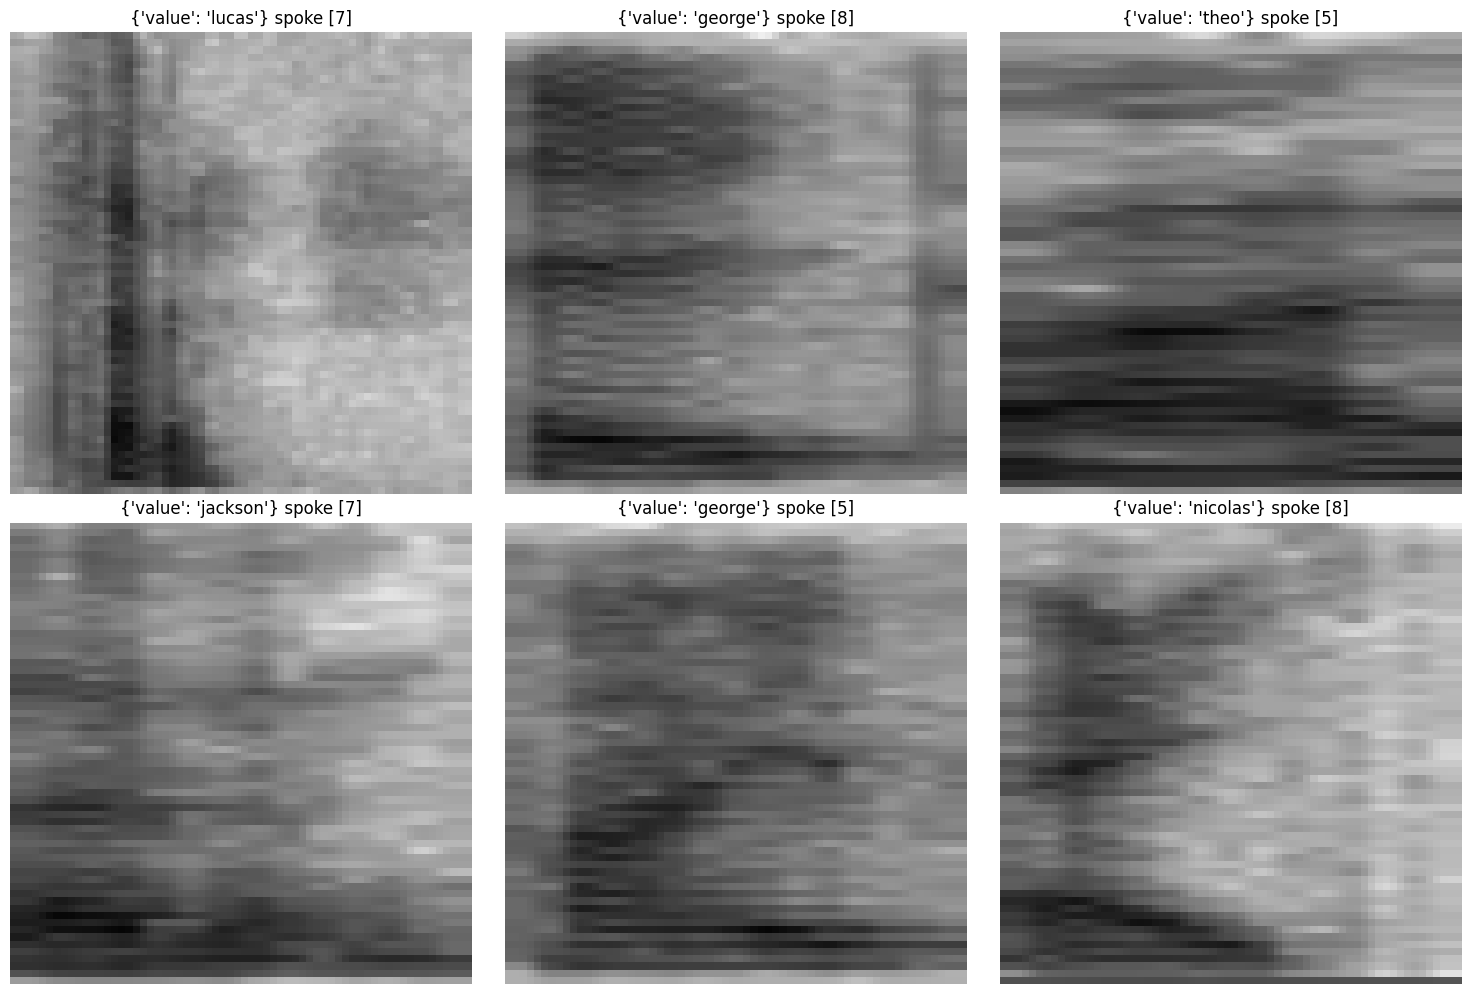

In [22]:
num_spectrograms = 6 
total_samples = len(ds.spectrograms)
random_indices = random.sample(range(total_samples), num_spectrograms)
rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

for i, idx in enumerate(random_indices):
    row = i // cols
    col = i % cols

    axes[row, col].imshow(ds.spectrograms[idx].numpy())
    axes[row, col].set_title(f"{ds.speakers[idx].data()} spoke {
                             ds.labels[idx].numpy()}")
    axes[row, col].axis('off')  

plt.tight_layout()
plt.show()

In [6]:
print(ds)

Dataset(path='hub://activeloop/spoken_mnist', read_only=True, tensors=['spectrograms', 'labels', 'audio', 'speakers'])


In [7]:
# Access dataset information
num_samples = len(ds.labels)
print("Number of samples:", num_samples)

Number of samples: 3000


In [8]:
# Converting dataset tensors to NumPy arrays
spectrograms = np.array(ds['spectrograms'])
labels = np.array(ds['labels'])

# Spliting the dataset into training, validation, and testing sets
train_spectrograms, test_spectrograms, train_labels, test_labels = train_test_split(
    spectrograms, labels, test_size=0.2, random_state=42)
train_spectrograms, val_spectrograms, train_labels, val_labels = train_test_split(
    train_spectrograms, train_labels, test_size=0.2, random_state=42)

# Normalizing the input data
train_spectrograms = train_spectrograms / 255.0
val_spectrograms = val_spectrograms / 255.0
test_spectrograms = test_spectrograms / 255.0

# Ensure labels are in the correct format 
train_labels = tf.keras.utils.to_categorical(
    train_labels, num_classes=10)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [9]:
print("Shape of train_spectrograms:", train_spectrograms.shape)

Shape of train_spectrograms: (1920, 64, 64, 4)


In [11]:
# Define spectrogram dimensions
spectrogram_height = 128  
spectrogram_width = 128   

# Define your CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 4)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output nodes for 10 digits
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

C:\Users\Elisha Stanley\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 647,146 (2.47 MB)

 Trainable params: 647,146 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

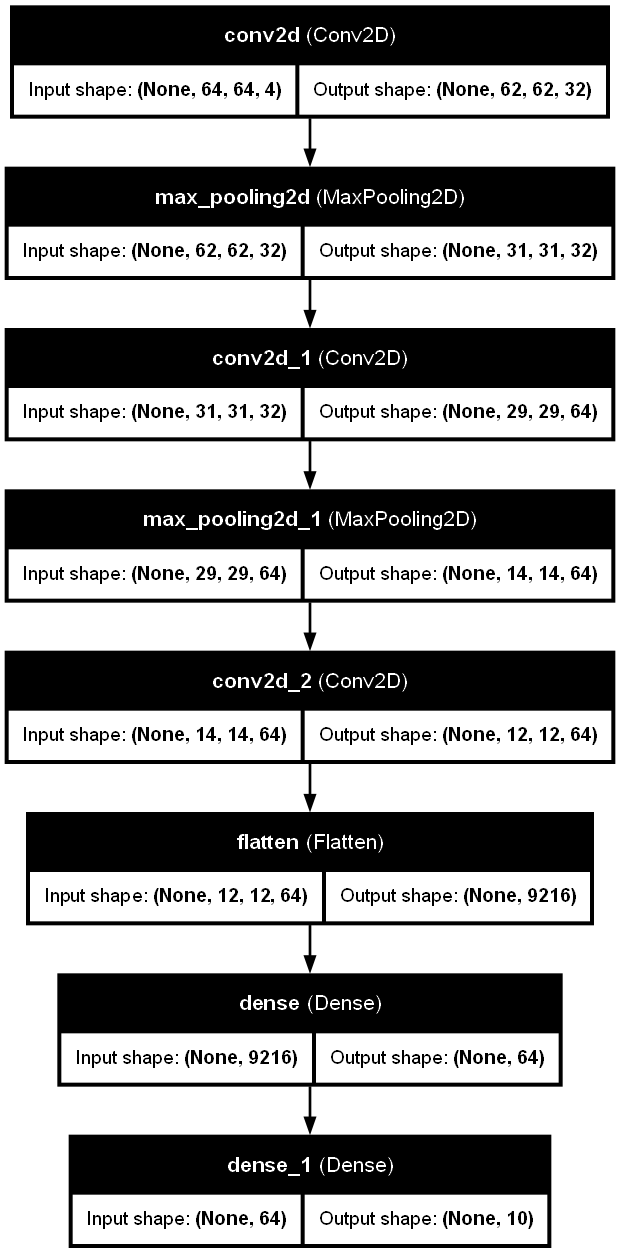

In [12]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,
           rankdir='TB', dpi=96)  # 'TB' for top-bottom, 'LR' for left-right

Image("model.png")

### Layer Breakdown

#### 1. `conv2d (Conv2D)`
- **Type**: Convolutional Layer (2D)
- **Output Shape**: `(None, 62, 62, 32)`
  - `None` indicates that the batch size can be any number.
  - The output feature map size is 62x62.
  - There are 32 filters in this layer.
- **Param #**: `1,184`
  - Calculated as `(kernel_height * kernel_width * input_channels + 1) * number_of_filters`
  - Assuming the kernel size is 3x3 and the input channels are 1 (e.g., grayscale image):
    - `(3 * 3 * 1 + 1) * 32 = 10 * 32 = 320`

#### 2. `max_pooling2d (MaxPooling2D)`
- **Type**: Max Pooling Layer (2D)
- **Output Shape**: `(None, 31, 31, 32)`
  - The spatial dimensions are reduced by half due to the pooling operation.
  - The number of channels remains the same.
- **Param #**: `0`
  - Max pooling layers do not have learnable parameters.

#### 3. `conv2d_1 (Conv2D)`
- **Type**: Convolutional Layer (2D)
- **Output Shape**: `(None, 29, 29, 64)`
  - The output feature map size is 29x29.
  - There are 64 filters in this layer.
- **Param #**: `18,496`
  - Calculated similarly as above with the new filter count and input channels from the previous layer:
    - `(3 * 3 * 32 + 1) * 64 = 1,856 * 64 = 18,496`

#### 4. `max_pooling2d_1 (MaxPooling2D)`
- **Type**: Max Pooling Layer (2D)
- **Output Shape**: `(None, 14, 14, 64)`
  - The spatial dimensions are reduced by half due to the pooling operation.
  - The number of channels remains the same.
- **Param #**: `0`
  - Max pooling layers do not have learnable parameters.

#### 5. `conv2d_2 (Conv2D)`
- **Type**: Convolutional Layer (2D)
- **Output Shape**: `(None, 12, 12, 64)`
  - The output feature map size is 12x12.
  - There are 64 filters in this layer.
- **Param #**: `36,928`
  - Calculated similarly as above with the same filter count but reduced input spatial dimensions:
    - `(3 * 3 * 64 + 1) * 64 = 5,760 + 64 = 5,824 * 64 = 36,928`

#### 6. `flatten (Flatten)`
- **Type**: Flattening Layer
- **Output Shape**: `(None, 9216)`
  - The 3D tensor from the previous layer is flattened into a 1D vector.
  - `12 * 12 * 64 = 9,216`
- **Param #**: `0`
  - Flattening layers do not have learnable parameters.

#### 7. `dense (Dense)`
- **Type**: Fully Connected Layer (Dense Layer)
- **Output Shape**: `(None, 64)`
  - The output is a 1D vector with 64 units.
- **Param #**: `589,888`
  - Calculated as `(input_units * output_units) + output_units`
  - Here, `9216 * 64 + 64 = 589,824 + 64 = 589,888`

#### 8. `dense_1 (Dense)`
- **Type**: Fully Connected Layer (Dense Layer)
- **Output Shape**: `(None, 10)`
  - The output is a 1D vector with 10 units, typically used for classification into 10 classes.
- **Param #**: `650`
  - Calculated as `(input_units * output_units) + output_units`
  - Here, `64 * 10 + 10 = 640 + 10 = 650`


In [16]:
# Train the model
history = model.fit(train_spectrograms, train_labels, epochs=10,
                    validation_data=(val_spectrograms, val_labels))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.2205 - loss: 2.1412 - val_accuracy: 0.6938 - val_loss: 0.9781
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.7317 - loss: 0.8278 - val_accuracy: 0.8542 - val_loss: 0.4348
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.8598 - loss: 0.4247 - val_accuracy: 0.8667 - val_loss: 0.3707
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.9188 - loss: 0.2588 - val_accuracy: 0.9104 - val_loss: 0.2594
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.9479 - loss: 0.1666 - val_accuracy: 0.9312 - val_loss: 0.2095
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.9505 - loss: 0.1451 - val_accuracy: 0.9563 - val_loss: 0.1447
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - accuracy: 0.9702 - loss: 0.0885 - val_accuracy: 0.9521 - val_loss: 0.1535
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.9806 - loss: 0.0662 - val_accuracy: 

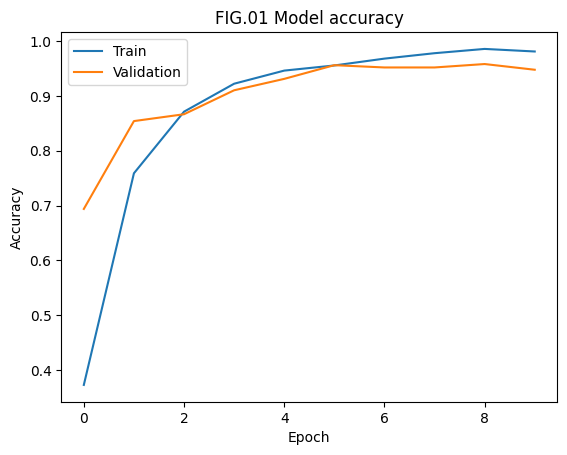

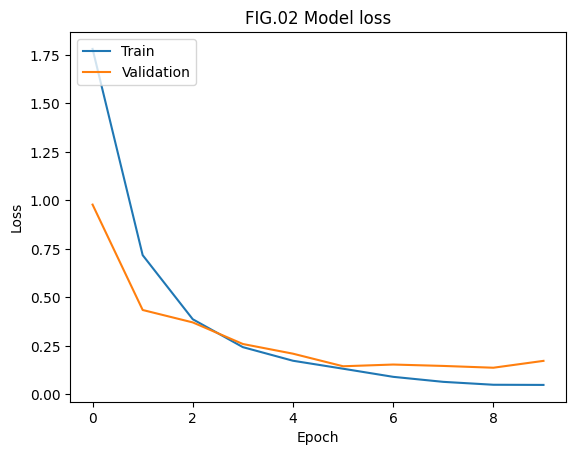

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('FIG.01 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('FIG.02 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_spectrograms, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9515 - loss: 0.1789
Test loss: 0.18108652532100677
Test accuracy: 0.9483333230018616


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


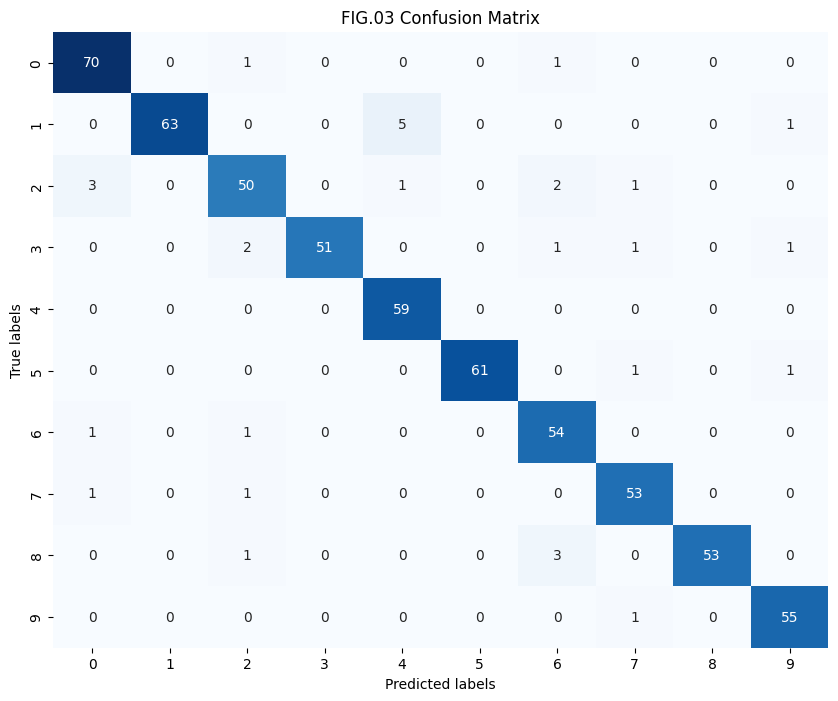

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(test_spectrograms)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = np.argmax(test_labels, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('FIG.03 Confusion Matrix')
plt.show()

In [34]:
# Make predictions on the test set
from sklearn.metrics import classification_report
predictions = model.predict(test_spectrograms)

# Convert one-hot encoded labels back to categorical labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate accuracy manually
accuracy = np.mean(predicted_labels == true_labels)
print('Test accuracy:', accuracy)

# You can also calculate other metrics such as precision, recall, and F1-score using scikit-learn
print(classification_report(true_labels, predicted_labels))

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
Test accuracy: 0.9316666666666666
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.93      0.95        69
           2       0.94      0.86      0.90        57
           3       0.81      0.98      0.89        56
           4       1.00      0.93      0.96        59
           5       0.95      0.92      0.94        63
           6       0.89      0.89      0.89        56
           7       0.88      0.93      0.90        55
           8       1.00      0.93      0.96        57
           9       0.96      0.95      0.95        56

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.94      0.93      0.93       600



In [44]:
# Save the model
model.save("Speech Recognition.h5")